In [17]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns

import matplotlib.style as style

In [69]:
# import necessary libraries
import pandas as pd
import demoji
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

In [36]:
df = pd.read_csv('tweets.csv',nrows=500)

In [37]:
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1


In [24]:
df.shape

(1000, 12)

In [25]:
# checking dataset

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1000
Columns  :  12

Features : 
 ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']

Missing values :   564

Unique values :  
 user_name           791
text                996
user_location       441
user_description    754
user_created        792
user_followers      593
user_friends        600
user_favourites     648
user_verified         2
date                935
hashtags            395
source               80
dtype: int64


In [10]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 401.5 kB/s eta 0:00:0000:0100:01


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyser=SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df['text'])):
    score=analyser.polarity_scores(df['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment']=pd.Series(np.array(sentiment))

In [27]:
df.head(3)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN,Positive
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,Neutral


In [55]:
df['user_verified'] = df['user_verified'].replace("['GPT4', 'ChatGPT4']",'False')

In [56]:
# user_favourites
# "2023-05-17 18:11:12+00:00",'100'
df['user_favourites'] = df['user_favourites'].replace("2023-05-17 18:11:12+00:00",'100')

In [38]:
df['user_location'].value_counts()

Hong Kong                       20
Manchester, NH                  14
United States                   12
UK                               9
Strathroy ON | Lakeport MI       9
                                ..
London & Miami                   1
Cambridge, England               1
FINN Global Health & Purpose     1
Erode                            1
Fort Lauderdale, FL              1
Name: user_location, Length: 234, dtype: int64

## Plotting

In [29]:
# Sentiment count
temp=df.groupby('sentiment')['text'].count().reset_index().sort_values(by='sentiment',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,text
2,Positive,593
1,Neutral,268
0,Negative,139


In [62]:
from collections import Counter
  
data_set = list(df['text'])
data_set = '\n'.join(data_set)
  
# split() returns list of all the words in the string
split_it = data_set.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(10)
print(most_occur)

[('#ChatGPT', 351), ('the', 331), ('to', 316), ('and', 238), ('a', 205), ('of', 178), ('#AI', 162), ('for', 159), ('in', 124), ('is', 122)]


In [64]:
x = []
y= [] 
for i,j in most_occur:
    x.append(i)
    y.append(j)

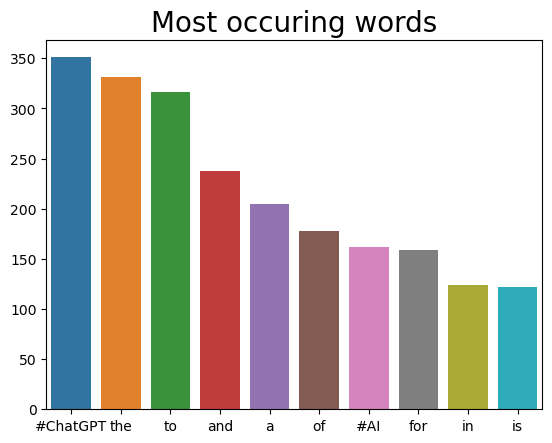

In [66]:
sns.barplot(x=x,y=y)
plt.title('Most occuring words',fontsize=20)
plt.show()

In [32]:
list(df['sentiment'].value_counts())

[593, 268, 139]

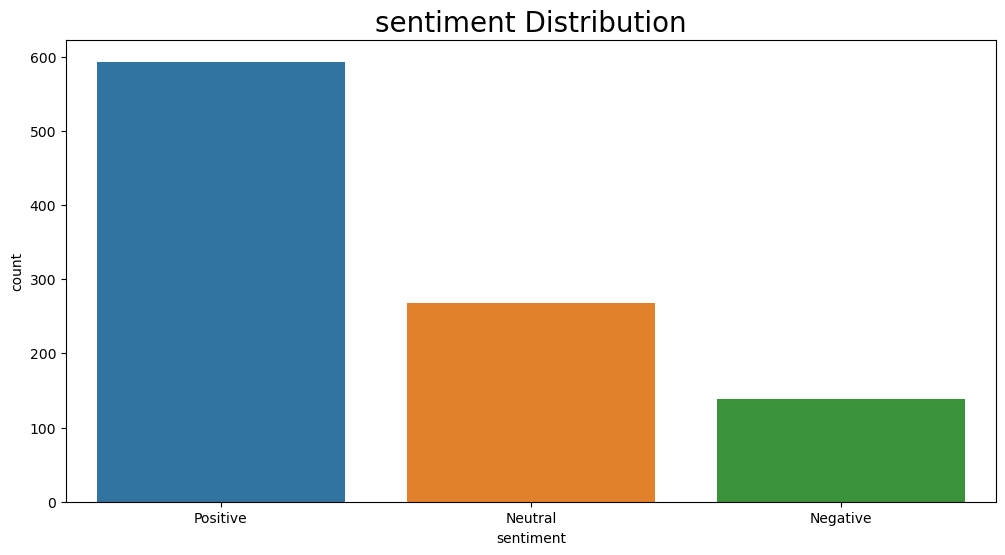

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x ='sentiment', data = df)
plt.title('sentiment Distribution',fontsize=20)
plt.show()

<Figure size 1200x600 with 0 Axes>

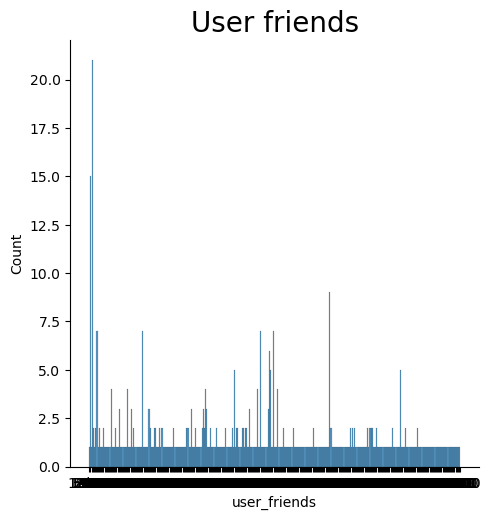

In [42]:
# User friends

plt.figure(figsize=(12,6))
sns.displot(x='user_friends',data=df)
plt.title('User friends',fontsize=20)
plt.show()

<Figure size 1200x600 with 0 Axes>

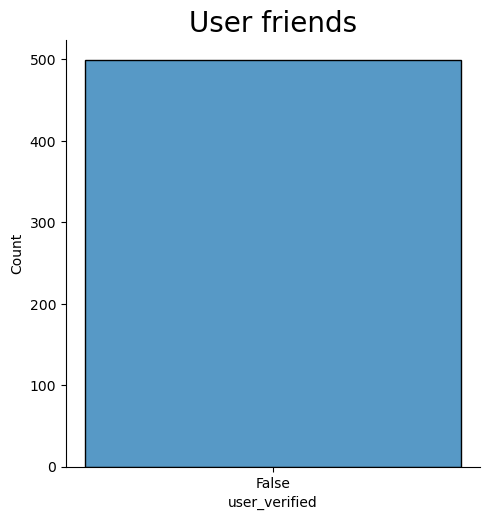

In [48]:
# Account Verified / Not verified

plt.figure(figsize=(12,6))
sns.displot(x='user_verified',data=df)
plt.title('User friends',fontsize=20)
plt.show()

In [52]:
df['user_favourites'].value_counts()

64       21
0        18
5185     14
1348     10
5752      9
         ..
415       1
23663     1
2562      1
3516      1
4464      1
Name: user_favourites, Length: 344, dtype: int64

In [57]:
df.head(3)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,100,False,Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it


# Preprocess and cleaning

In [70]:
# define a function to preprocess the text
def preprocess_text(text):
    # remove emoji
    text = demoji.replace(text, "")
    # remove URLs
    text = " ".join(word for word in text.split() if not "http" in word)
    # remove usernames
    text = " ".join(word for word in text.split() if not word.startswith("@"))
    # remove punctuation
    text = "".join(word for word in text if not word in string.punctuation)
    # convert to lowercase
    text = text.lower()
    return text


In [71]:
def preprocess(df2):
    df2 = df2.drop_duplicates()
    df2 = df2.dropna()
    df2['text'] = df2['text'].apply(lambda x: preprocess_text(x))
    return df2
    

In [72]:
new_df = preprocess(df)

In [73]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App


In [74]:
# remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
def sw_removal(df):
# Set up the NLTK stopwords

    stop_words = set(stopwords.words('english'))
    
    # tokenization

    # Tokenize the text in the 'my_column' column
    df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
    
    
    # Remove stopwords from the tokenized text in the 'my_column' column
    df['stop_words_removed_tokenized'] = df['tokenized'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])
    
    df['text2'] = df['stop_words_removed_tokenized'].apply(lambda x : " ".join(x))
    
    return df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
new_df = sw_removal(new_df)

In [76]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,tokenized,stop_words_removed_tokenized,text2
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,"[video, show, a, companys, logo, based, on, th...","[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,"[i, just, used, my, cerberusgpt, hologeneticsl...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...


In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define functions to lemmatize and stem a list of words
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

def stem_words(words):
    return [stemmer.stem(word) for word in words]

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
def stem_and_lemma(df):
    
    # Add new columns containing the lemmatized and stemmed words
    df['lemmatized'] = df['stop_words_removed_tokenized'].apply(lambda x: lemmatize_words(x))
    df['stemmed'] = df['stop_words_removed_tokenized'].apply(lambda x: stem_words(x))
    return df

In [82]:
new_df = stem_and_lemma(new_df)

In [83]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,tokenized,stop_words_removed_tokenized,text2,lemmatized,stemmed
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year..."
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50..."
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ..."
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,"[video, show, a, companys, logo, based, on, th...","[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...,"[video, show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom..."
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,"[i, just, used, my, cerberusgpt, hologeneticsl...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,"[used, cerberusgpt, hologeneticslab, simulated...","[use, cerberusgpt, hologeneticslab, simul, hol..."


In [85]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [84]:
import string

In [86]:
def remove_extra(df):
    # lemmatized2 will be without punctuatio
    df['lemmatized2'] = df['lemmatized'].apply(lambda x: [word for word in x if word not in string.punctuation])
    df['text3'] = df['lemmatized2'].apply(lambda x : " ".join(x))
    df['text3'] = df['text3'].apply(lambda x: remove_URL(x))
    df['text3'] = df['text3'].apply(lambda x: remove_html(x))
    df['text3'] = df['text3'].apply(lambda x: remove_emoji(x))
    return df

In [87]:
new_df = remove_extra(new_df)

In [88]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,tokenized,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,"[video, show, a, companys, logo, based, on, th...","[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...,"[video, show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[video, show, company, logo, based, website, d...",video show company logo based website domain s...
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,"[i, just, used, my, cerberusgpt, hologeneticsl...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,"[used, cerberusgpt, hologeneticslab, simulated...","[use, cerberusgpt, hologeneticslab, simul, hol...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...


## N-Gram analysis

In [90]:
from nltk import word_tokenize
from nltk import FreqDist
from nltk import ngrams

In [95]:
# Tokenize the text into unigrams


text = ' '.join(new_df['text'])

tokens = word_tokenize(text)


bi = list(ngrams(tokens, 2))

tri = list(ngrams(tokens, 3))

bi_fdist = FreqDist(bi)

tri_fdist = FreqDist(tri)

print('Bi gram most common top 10 = ',bi_fdist.most_common(10))
print('\n##########################\n')

print('Tri gram most common top 10 = ',tri_fdist.most_common(10))

Bi gram most common top 10 =  [(('powered', 'by'), 25), (('by', 'chatgpt'), 23), (('chatgpt', 'ai'), 22), (('last', 'price'), 20), (('are', 'you'), 20), (('recommendation', 'short'), 18), (('short', 'ticker'), 18), (('gon', 'na'), 17), (('ai', 'openai'), 15), (('of', 'the'), 15)]

##########################

Tri gram most common top 10 =  [(('powered', 'by', 'chatgpt'), 20), (('recommendation', 'short', 'ticker'), 18), (('binance', 'spot', 'recommendation'), 15), (('spot', 'recommendation', 'short'), 15), (('what', 'are', 'you'), 15), (('are', 'you', 'gon'), 15), (('you', 'gon', 'na'), 15), (('gon', 'na', 'do'), 15), (('na', 'do', 'long'), 15), (('do', 'long', 'wait'), 15)]


# Plotting

In [122]:
bi_list_name = []
bi_list_val = []
tri_list_name = []
tri_list_val = []

In [123]:
for i, j in bi_fdist.most_common(10):
    bi_list_name.append(f'{i[0]+" "+i[1]}')
    bi_list_val.append(j)
    

In [124]:
for i, j in tri_fdist.most_common(10):
    tri_list_name.append(f'{i[0]+" "+i[1]+" "+i[2]}')
    tri_list_val.append(j)
    

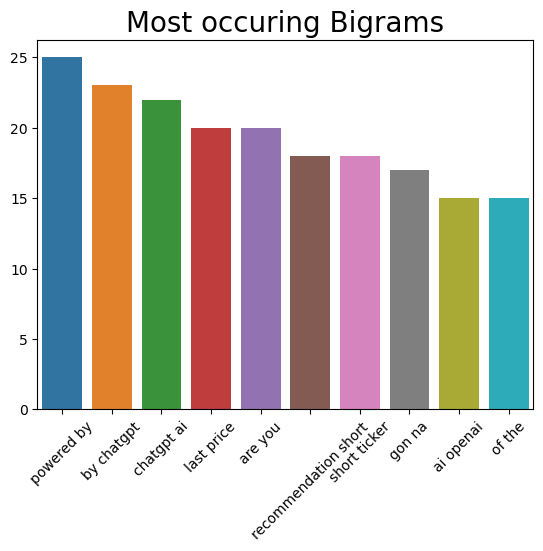

In [125]:
sns.barplot(x=bi_list_name,y=bi_list_val)
plt.title('Most occuring Bigrams',fontsize=20)
plt.xticks(rotation = 45)
plt.show()

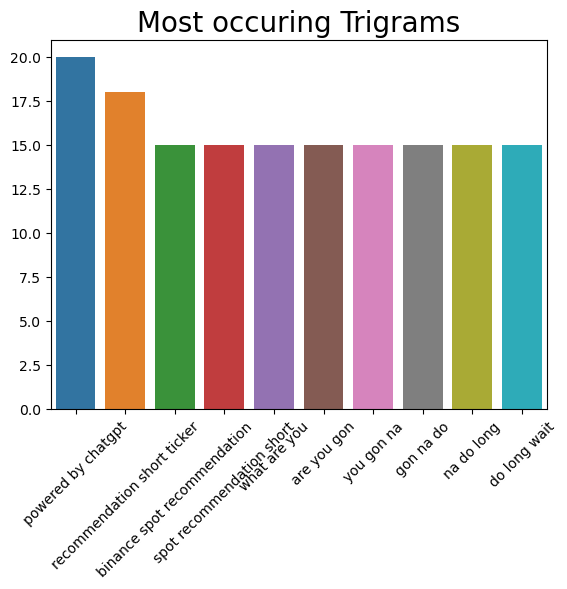

In [126]:
sns.barplot(x=tri_list_name,y=tri_list_val)
plt.title('Most occuring Trigrams',fontsize=20)
plt.xticks(rotation = 45)
plt.show()

In [127]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 865.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp39-cp39-macosx_11_0_arm64.whl size=153083 sha256=a264ce1dde5ccaa08aa2346fa1a833f5d29ea15cb588912700304560a5a9b5a3
  Stored in directory: /Users/student/Library/Caches/pip/wheels/97/4a/4e/ebf8252ba08b46a4d8e4eb21c5594f14dacd808ec1fc4b6eb5
Successfully built wordcloud


In [132]:
text = " ".join(review for review in new_df.text3)

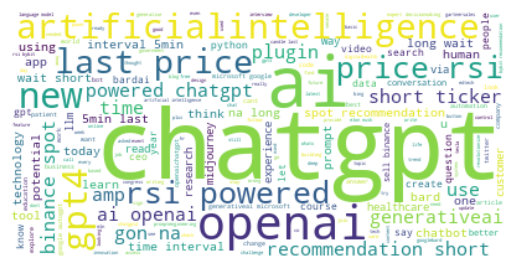

In [133]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [139]:
from textblob import TextBlob

def sentiment_analysis(df):
    
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
    df['TextBlob_Subjectivity'] = df['text3'].apply(getSubjectivity)
    df['TextBlob_POLARITY'] = df['text3'].apply(getPolarity)
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
    df['sentiment_by_blob'] = df['TextBlob_POLARITY'].apply(getAnalysis )
    df = df.drop(['TextBlob_Subjectivity','TextBlob_POLARITY'],axis=1)
    return df

In [140]:
new_df = sentiment_analysis(new_df)

In [141]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,tokenized,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3,sentiment_by_blob
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...,Neutral
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...,Positive
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,Negative
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,"[video, show, a, companys, logo, based, on, th...","[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...,"[video, show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[video, show, company, logo, based, website, d...",video show company logo based website domain s...,Neutral
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,"[i, just, used, my, cerberusgpt, hologeneticsl...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,"[used, cerberusgpt, hologeneticslab, simulated...","[use, cerberusgpt, hologeneticslab, simul, hol...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,Negative


In [142]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.2 MB/s eta 0:00:00a 0:00:01


# Using HuggingFace Bert Pipeline

In [145]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 8.4 MB/s eta 0:00:0000:0100:01m


In [146]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classi

In [154]:
inputs = tokenizer("Hello, my dog is ugly  bad", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]


'LABEL_0'

In [159]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.9 MB/s eta 0:00:00a 0:00:010m


In [161]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)


In [168]:
new_df.head(3)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,tokenized,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3,sentiment_by_blob
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...,Neutral
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...,Positive
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,Negative


In [169]:
bert_pred = []

In [170]:
for ind in new_df.index:

    text = new_df['text3'][ind]
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # # TF
    # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
    # model.save_pretrained(MODEL)

    # text = "Good night 😊"
    # encoded_input = tokenizer(text, return_tensors='tf')
    # output = model(encoded_input)
    # scores = output[0][0].numpy()
    # scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    arg = np.argmax(scores.shape[0])
    pred = labels[ranking[arg]]
    if pred=='negative':
        pred='Negative'
    elif pred=='positive':
        pred='Positive'
    elif pred =='neutral':
        pred='Neutral'
        
    bert_pred.append(pred)
    
    
    
    
        


In [171]:
# text = "baddd sad ugly 😊"
# text = preprocess(text)
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)
# scores = output[0][0].detach().numpy()
# scores = softmax(scores)

# # # TF
# # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# # model.save_pretrained(MODEL)

# # text = "Good night 😊"
# # encoded_input = tokenizer(text, return_tensors='tf')
# # output = model(encoded_input)
# # scores = output[0][0].numpy()
# # scores = softmax(scores)

# ranking = np.argsort(scores)
# ranking = ranking[::-1]
# arg = np.argmax(scores.shape[0])
# pred = labels[ranking[arg]]
# print('pred = ',pred)
# for i in range(scores.shape[0]):
#     l = labels[ranking[i]]
#     s = scores[ranking[i]]
#     print(f"{i+1}) {l} {np.round(float(s), 4)}")

In [172]:
new_df['sentiment_by_bert']=bert_pred

In [173]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,tokenized,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3,sentiment_by_blob,sentiment_by_bert
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,...,dlvr.it,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...,Neutral,Neutral
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,...,Twitter Web App,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...,Positive,Neutral
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,...,rsi1,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,Negative,Neutral
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,...,RiteKit App,"[video, show, a, companys, logo, based, on, th...","[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...,"[video, show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[video, show, company, logo, based, website, d...",video show company logo based website domain s...,Neutral,Neutral
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,...,Twitter Web App,"[i, just, used, my, cerberusgpt, hologeneticsl...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,"[used, cerberusgpt, hologeneticslab, simulated...","[use, cerberusgpt, hologeneticslab, simul, hol...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,Negative,Neutral


In [174]:
final_pred = []

In [175]:
for ind in new_df.index:
    pred1 = new_df['sentiment_by_blob'][ind]
    pred2 = new_df['sentiment_by_bert'][ind]
    
    if pred1==pred2:
        final_pred.append(pred1)
    else:
        final_pred.append(pred2)
        

In [177]:
new_df['final_pred']=final_pred

In [178]:
new_df.head(3)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,tokenized,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3,sentiment_by_blob,sentiment_by_bert,final_pred
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,...,"[chatgpt, thinks, these, 5, crypto, coins, wil...","[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...,Neutral,Neutral,Neutral
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,...,"[new, post, about, 5, startups, including, tha...","[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...,Positive,Neutral,Neutral
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,...,"[get, out, binance, spot, recommendation, shor...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,Negative,Neutral,Neutral


# Vectorization

In [180]:
# count vec

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(stop_words='english',max_features=8000)

bow.fit(new_df['text3'])

CountVectorizer(max_features=8000, stop_words='english')

In [181]:
bow.get_feature_names_out()


array(['000334', '000618', '00062', ..., 'zeller', 'zilliqa', 'zoom'],
      dtype=object)

In [201]:
X = bow.fit_transform(new_df['text3'])

In [208]:
X.shape

(274, 1724)

In [203]:
Count_vect_df = pd.DataFrame(list(X.toarray()), columns=bow.get_feature_names_out())

In [204]:
Count_vect_df.head()

,000334,000618,00062,001635,00197,00334,0068,01451,02105,0487,...,yesterday,yo,yolo,youll,young,youre,youtube,zeller,zilliqa,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()


In [205]:
# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(new_df['text3'])

# Transform the test data using the fitted vectorizer
# Tf_df = pd.DataFrame()

Tf_df = pd.DataFrame(list(X_train_tfidf.toarray()), columns=vectorizer.get_feature_names_out())

# Add the TF-IDF values to the DataFrame
# Tf_df['tfidf'] = list(X_train_tfidf.toarray())

In [206]:
Tf_df.head(4)

,000334,000618,00062,001635,00197,00334,0068,01451,02105,0487,...,yet,yo,yolo,youll,young,youre,youtube,zeller,zilliqa,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
Tf_df.shape

(274, 1801)

In [209]:
from gensim.models import Word2Vec

In [211]:
model = Word2Vec(new_df['text3'], min_count=2)

## Feature selection

In [252]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3,sentiment_by_blob,sentiment_by_bert,final_pred,user_followers2
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,...,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...,Neutral,Neutral,Neutral,470.0
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,...,"[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...,Positive,Neutral,Neutral,3864.0
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,...,"[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,Negative,Neutral,Neutral,1517.0
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,...,"[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...,"[video, show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[video, show, company, logo, based, website, d...",video show company logo based website domain s...,Neutral,Neutral,Neutral,176.0
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,...,"[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,"[used, cerberusgpt, hologeneticslab, simulated...","[use, cerberusgpt, hologeneticslab, simul, hol...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,Negative,Neutral,Neutral,123.0


In [261]:
user_friends = []

In [262]:
for ind in new_df.index:
    val1 = new_df['user_friends'][ind]
    print('typ 1= ',type(val1))
    print('va = ',val1)
    if type(val1)==str:
        try:
            val1 = int(val1)
        except:
            val1 = 150
    print('typ 2 = ',type(val1))
    user_friends.append(val1)

typ 1=  <class 'str'>
va =  157.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  1883.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  506.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  54.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  299.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  506.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  0.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  506.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  598.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  506.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  143.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  225.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  2622.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  95.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  4909.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  506.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  506.0
typ 2 =  <class 'int'>
typ 1=  <class 'str'>
va =  4371

In [263]:
new_df['user_friends2'] = user_friends

In [269]:
new_df.drop('user_friends2',axis=1,inplace=True)

In [270]:
new_df.corr()

/var/folders/j_/pkfzpv5x4xv9mb1gxwdtxsrr0000gn/T/ipykernel_1308/4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,user_followers
user_followers,1.0


# Model Preparation

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [276]:
new_df['sentiment'] = new_df['final_pred'].replace(['Positive','Negative','Neutral'],[1,-1,0])

In [277]:
new_df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,stop_words_removed_tokenized,text2,lemmatized,stemmed,lemmatized2,text3,sentiment_by_blob,sentiment_by_bert,final_pred,sentiment
2,Dan Bruno AI,chatgpt thinks these 5 crypto coins will explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,...,"[chatgpt, thinks, 5, crypto, coins, explode, y...",chatgpt thinks 5 crypto coins explode year yah...,"[chatgpt, think, 5, crypto, coin, explode, yea...","[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explode, yea...",chatgpt think 5 crypto coin explode year yahoo...,Neutral,Neutral,Neutral,0
3,Georgiana Comsa,new post about 5 startups including that won t...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,...,"[new, post, 5, startups, including, 1st, start...",new post 5 startups including 1st startup50 ch...,"[new, post, 5, startup, including, 1st, startu...","[new, post, 5, startup, includ, 1st, startup50...","[new, post, 5, startup, including, 1st, startu...",new post 5 startup including 1st startup50 cha...,Positive,Neutral,Neutral,0
4,Bitone Great,get out binance spot recommendation short tick...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,...,"[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,"[get, binance, spot, recommendation, short, ti...","[get, binanc, spot, recommend, short, ticker, ...","[get, binance, spot, recommendation, short, ti...",get binance spot recommendation short ticker g...,Negative,Neutral,Neutral,0
6,ScrapeLogo: acquired by RiteKit in 2015,video show a companys logo based on the websi...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,...,"[video, show, companys, logo, based, website, ...",video show companys logo based website domain ...,"[video, show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[video, show, company, logo, based, website, d...",video show company logo based website domain s...,Neutral,Neutral,Neutral,0
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,i just used my cerberusgpt hologeneticslab and...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,...,"[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,"[used, cerberusgpt, hologeneticslab, simulated...","[use, cerberusgpt, hologeneticslab, simul, hol...","[used, cerberusgpt, hologeneticslab, simulated...",used cerberusgpt hologeneticslab simulated hol...,Negative,Neutral,Neutral,0


In [283]:
# Split the data into training and testing sets using sentiment_using_textblob
X_train, X_test, y_train, y_test = train_test_split(new_df['text3'], new_df['sentiment_by_blob'], test_size=0.1, random_state=123)

# TF IDF + RANDOMFORREST/NAIVE BAYES/RNN

In [284]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [285]:
# Define the models to train and test
models = [
    ("LinearSVC", LinearSVC()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("MultinomialNB", MultinomialNB()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier())
]

In [291]:
TF_MODELS_NAME = []
TF_MODELS_ACC = []
TF_MODELS_PREC = []

In [287]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score



In [293]:
# Train and evaluate models on the TF-IDF vectors
for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average=None)
    TF_MODELS_NAME.append(name)
    TF_MODELS_ACC.append(acc)
    TF_MODELS_PREC.append(acc)
    print(f"Model: {name}\n{classification_report(y_test, y_pred)}\n")
    

Model: LinearSVC
              precision    recall  f1-score   support

    Negative       1.00      0.25      0.40         4
     Neutral       0.60      0.82      0.69        11
    Positive       0.83      0.77      0.80        13

    accuracy                           0.71        28
   macro avg       0.81      0.61      0.63        28
weighted avg       0.77      0.71      0.70        28


Model: Logistic Regression
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.60      0.82      0.69        11
    Positive       0.77      0.77      0.77        13

    accuracy                           0.68        28
   macro avg       0.46      0.53      0.49        28
weighted avg       0.59      0.68      0.63        28


Model: MultinomialNB
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.57      0.73      0.64        11
    Posi

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9

# COUNT_VECTORIZER + RANDOMFOREST/NAIVE BAYES/

In [295]:
# Vectorize the text data using Count_Vect

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(stop_words='english',max_features=8000)
X_train_tfidf2 = bow.fit_transform(X_train)
X_test_tfidf2 = bow.transform(X_test)


In [296]:
# Define the models to train and test
models = [
    ("LinearSVC", LinearSVC()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("MultinomialNB", MultinomialNB()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier())
]

TF_MODELS_NAME2 = []
TF_MODELS_ACC2 = []
TF_MODELS_PREC2 = []



In [297]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score



# Train and evaluate models on the TF-IDF vectors
for name, model in models:
    model.fit(X_train_tfidf2, y_train)
    y_pred = model.predict(X_test_tfidf2)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average=None)
    TF_MODELS_NAME2.append(name)
    TF_MODELS_ACC2.append(acc)
    TF_MODELS_PREC2.append(acc)
    print(f"Model: {name}\n{classification_report(y_test, y_pred)}\n")

Model: LinearSVC
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.62      0.91      0.74        11
    Positive       0.83      0.77      0.80        13

    accuracy                           0.71        28
   macro avg       0.49      0.56      0.51        28
weighted avg       0.63      0.71      0.66        28


Model: Logistic Regression
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.60      0.82      0.69        11
    Positive       0.77      0.77      0.77        13

    accuracy                           0.68        28
   macro avg       0.46      0.53      0.49        28
weighted avg       0.59      0.68      0.63        28


Model: MultinomialNB
              precision    recall  f1-score   support

    Negative       1.00      0.25      0.40         4
     Neutral       0.64      0.82      0.72        11
    Posi

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9

# word2vec + naive bayes/random forrest/decision tree

In [299]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Sample training data
train_data = new_df['text3']

# Preprocess and tokenize the training data
processed_data = [text.split() for text in train_data]



In [306]:
# Train Word2Vec model
model = Word2Vec(processed_data, min_count=1)

# Define the text classifier pipeline
classifier = Pipeline([
    ("word2vec", TfidfVectorizer(
        tokenizer=lambda text: [token for token in text.split() if token in model.wv],
        preprocessor=lambda text: text
    )),
    ("naive_bayes", MultinomialNB())
])

# Prepare training data
X_train = [text for text in train_data]
y_train = new_df['sentiment']

# Train the classifier
classifier.fit(X_train, y_train)

# Sample test data
test_data = [
    "I really enjoyed the movie",
    "This film is amazing",
    "The movie was disappointing",
    "I hated it"
]

# Make predictions on test data
predictions = classifier.predict(test_data)




/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [307]:

TF_MODELS_NAME3 = []
TF_MODELS_ACC3 = []
TF_MODELS_PREC3 = []